In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
star_data <- read_csv("HTRU_2.csv", col_names = FALSE) %>%
    rename("Mean_profile" = X1,"SD_profile" = X2,"Kurtois_profile" = X3,"Skewness_profile" = X4,"Mean_curve" = X5,"SD_curve" = X6,"Kortuis_curve" = X7,"Skewness_curve" = X8,"Class" = X9) %>%
    mutate(Class = as_factor(Class))
star_data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Mean_profile,SD_profile,Kurtois_profile,Skewness_profile,Mean_curve,SD_curve,Kortuis_curve,Skewness_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,0
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,0


In [3]:
star_split <- initial_split(star_data, prop = 0.75, strata = Class)  
star_train <- training(star_split)   
star_test <- testing(star_split)

In [4]:
number_of_class <- star_train %>%
    group_by(Class) %>%
    count()

mean_of_predictors <- star_train %>%
    select(-Class) %>%
    map_dfr(mean)

number_of_NA <- sum(is.na(star_train))

number_of_class
mean_of_predictors
number_of_NA

Class,n
<fct>,<int>
0,12185
1,1238


Mean_profile,SD_profile,Kurtois_profile,Skewness_profile,Mean_curve,SD_curve,Kortuis_curve,Skewness_curve
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
110.9438,46.52604,0.4842803,1.813149,12.70839,26.36387,8.278791,104.1045


[1] 0

As you can see above, the data set has been split into a training set containing 75% and a test set containing 25%. In the training set, there are 12182 class 0 and 1241 class 1. You are also able to see a table containing the mean of each of the predictors, and lastly you can see that there are no "NA" in our dataset.

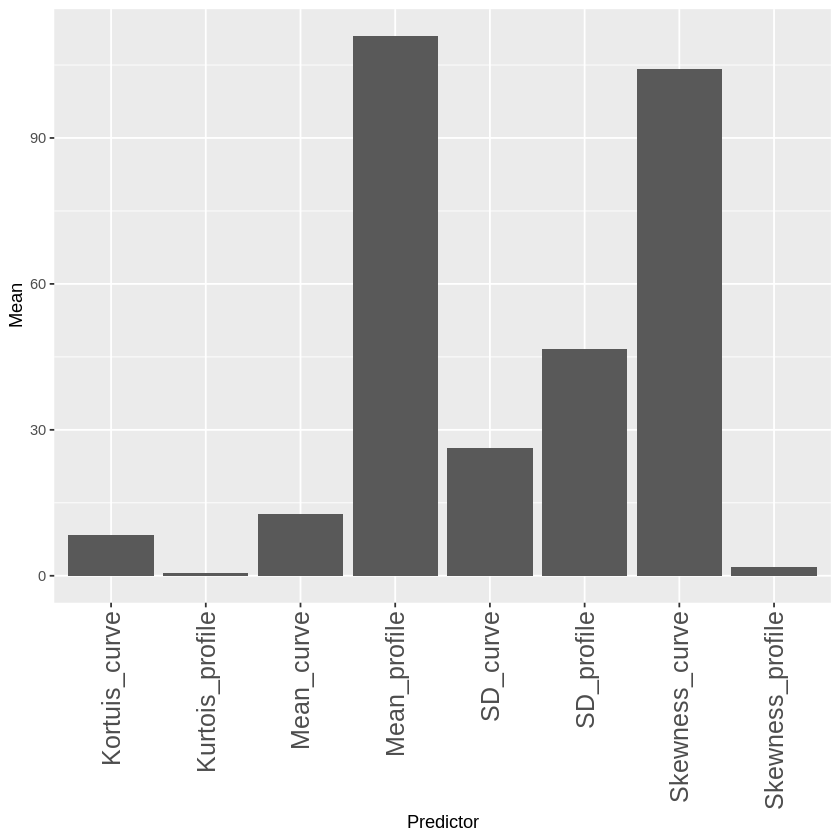

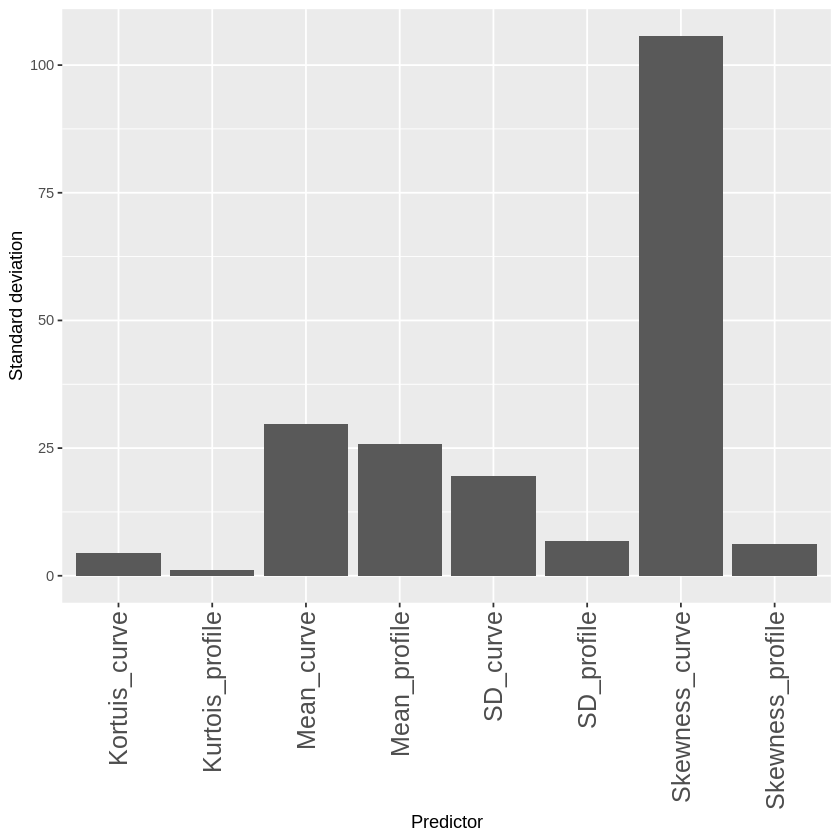

In [8]:
sd_of_predictors <- star_train %>%
    select(-Class) %>%
    map_dfr(sd)

pivot_long_mean <- mean_of_predictors %>%
    pivot_longer(cols = Mean_profile:Skewness_curve, names_to = "Variable", values_to = "mean")
pivot_long_sd <- sd_of_predictors %>%
    pivot_longer(cols = Mean_profile:Skewness_curve, names_to = "Variable", values_to = "sd")

explanatory_plot_mean <- ggplot(data = pivot_long_mean, aes(x = Variable, y = mean)) + geom_bar(stat='identity') +
    ylab("Mean") + xlab("Predictor") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 15)) 
explanatory_plot_sd <- ggplot(data = pivot_long_sd, aes(x = Variable, y = sd)) + geom_bar(stat='identity') +
    ylab("Standard deviation") + xlab("Predictor") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 15))

explanatory_plot_mean
explanatory_plot_sd


On the plot above the mean and standard deviation of all the predictors are shown in two bar plots. These plots gives a quick overview of the nummerical size (by lookin at the mean) and the spread of the numbers for each predictor. It is clear that there is quite a large difference in the mean and standard deviation of the predictors, which goes to show that it is probably a good idea to centralise and standardise the data.